# 1st delete NaN

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
predict = pd.read_csv('data/test.csv')

In [3]:
passenger_id = predict[['id']].copy()

In [4]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75000,374999.50000,562499.25000,749999.00
Episode_Length_minutes,662907.0,64.504738,32.969603,0.0,35.73000,63.84000,94.07000,325.24
Host_Popularity_percentage,750000.0,59.859901,22.873098,1.3,39.41000,60.05000,79.53000,119.46
Guest_Popularity_percentage,603970.0,52.236449,28.451241,0.0,28.38000,53.58000,76.60000,119.91
Number_of_Ads,749999.0,1.348855,1.151130,0.0,0.00000,1.00000,2.00000,103.91
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


In [6]:
predict.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [7]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [9]:
train.nunique()

id                             750000
Podcast_Name                       48
Episode_Title                     100
Episode_Length_minutes          12268
Genre                              10
Host_Popularity_percentage       8038
Publication_Day                     7
Publication_Time                    4
Guest_Popularity_percentage     10019
Number_of_Ads                      12
Episode_Sentiment                   3
Listening_Time_minutes          42807
dtype: int64

In [10]:
predict.shape

(250000, 11)

# Preprocessing of data

In [11]:
def create_features(df):
    #df[['Episode_Name','Episode_Num']] = df['Episode_Title'].str.split(' ', expand=True)
    #df['Episode_Num'] = df['Episode_Num'].astype(int)
    return df

train = create_features(train)
predict = create_features(predict)

# 異常値処理

In [12]:
def clean_abnormal_values(df):
    
    # 100%以上はクリップ（`.loc` を使って変更）
    df.loc[:, 'Host_Popularity_percentage'] = df['Host_Popularity_percentage'].clip(upper=100)
    df.loc[:, 'Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].clip(upper=100)

    df.loc[:, 'Episode_Length_minutes'] = df['Episode_Length_minutes'].clip(upper=125)
    df.loc[:, 'Number_of_Ads'] = df['Number_of_Ads'].clip(upper=12)
    
    return df

# train と predict に適用
train = clean_abnormal_values(train)
predict = clean_abnormal_values(predict)
train['Number_of_Ads'] = train['Number_of_Ads'].fillna(train['Number_of_Ads'].mean())

In [13]:
# columns to drop 
def delete_columns(df):
    #df.drop(columns=['id','Episode_Title','Episode_Length_minutes','Guest_Popularity_percentage'], inplace=True)
    df.drop(columns=['id'], inplace=True)
    return df

train = delete_columns(train)
predict = delete_columns(predict)

In [14]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


# Data preparation before modeling

### Since there are few tpyes of object data,label encoding will be applied


In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

def label_enocding(df,columns):
    le = LabelEncoder()

    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

encoding_cols = ['Podcast_Name','Genre','Publication_Day',
                 'Publication_Time','Episode_Sentiment','Episode_Title']

train = label_enocding(train, encoding_cols)
predict = label_enocding(predict, encoding_cols)


In [16]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,34,98,NaN,9,74.81,4,3,NaN,0.0,2,31.41998
1,24,19,119.80,1,66.95,2,0,75.95,2.0,0,88.01241
2,40,8,73.90,2,69.97,5,1,8.97,0.0,0,44.92531
3,10,40,67.17,8,57.22,1,2,78.70,2.0,2,46.27824
4,31,85,110.51,3,80.07,1,0,58.68,3.0,1,75.61031


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  int64  
 1   Episode_Title                750000 non-null  int64  
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  int64  
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  int64  
 6   Publication_Time             750000 non-null  int64  
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                750000 non-null  float64
 9   Episode_Sentiment            750000 non-null  int64  
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 62.9 MB


In [18]:
""" ロバストスケーリング
from sklearn.preprocessing import RobustScaler

def normalize_data(df):
    scaler = RobustScaler()
    # スケーリングを行うカラムを指定
    #columns_to_scale = ['Episode_Length_minutes', 'Number_of_Ads']
    columns_to_scale = ['Episode_Length_minutes']
    
    # スケーリングを実行
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df

train = normalize_data(train)
predict = normalize_data(predict)
#"""

" ロバストスケーリング\nfrom sklearn.preprocessing import RobustScaler\n\ndef normalize_data(df):\n    scaler = RobustScaler()\n    # スケーリングを行うカラムを指定\n    #columns_to_scale = ['Episode_Length_minutes', 'Number_of_Ads']\n    columns_to_scale = ['Episode_Length_minutes']\n\n    # スケーリングを実行\n    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])\n\n    return df\n\ntrain = normalize_data(train)\npredict = normalize_data(predict)\n#"

In [19]:
from sklearn.model_selection import train_test_split

def split_data(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['Listening_Time_minutes'])
    y = df['Listening_Time_minutes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(train)
predict_X = predict.copy()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_metrics(y_true,y_pred):
    
    results = []

    def calulate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        return {
            'MSE': mse,
            'RMSE': mae,
            'R2': r2
        }
    results.append(calulate_metrics(y_true, y_pred))

    return pd.DataFrame(results)

In [21]:
#"""
import xgboost as xgb
from catboost import CatBoostRegressor
import joblib

# xgboostモデルの読み込み
xgboost_model = xgb.XGBRegressor()
xgboost_model.load_model("model/xgboost/xgb_model_1.json")
#"""


# catboostモデルの読み込み
catboost_model = CatBoostRegressor()
catboost_model.load_model("model/catboost/catboost_model_1.cbm")

# ramdomモデルの読み込み
random_model = joblib.load('model/random_forest/rf_model_1.pkl')

In [22]:
xgbd_pred = xgboost_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)
random_pred = random_model.predict(X_test)


In [23]:
import optuna
from sklearn.metrics import mean_squared_error

def optimize_weight(trial):
    # 各モデルの重み（合計が1になるように制約をつける）
    w1 = trial.suggest_float('catboost_weight', 0.0, 1.0)
    w2 = trial.suggest_float('xgb_weight', 0.0, 1.0)

    # 3つ目のモデルの重みは1から引いた残り
    w3 = 1.0 - w1 - w2

    # w3が0未満になる場合は無効（重み合計が1超え）
    if w3 < 0:
        return float('inf')  # 無効な組み合わせとして扱う

    final_pred = (
        w1 * catboost_pred +
        w2 * xgbd_pred +
        w3 * random_pred
    )

    mse = mean_squared_error(y_test, final_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(optimize_weight, n_trials=500)

# 最適な重みの取得
best_params = study.best_params
best_catboost_weight = best_params['catboost_weight']
best_xgb_weight = best_params['xgb_weight']
best_random_weight = 1.0 - best_catboost_weight - best_xgb_weight

print(f"Best weights -> CatBoost: {best_catboost_weight:.4f}, XGBoost: {best_xgb_weight:.4f}, Random: {best_random_weight:.4f}")

# 最適な重みで再計算
final_pred = (
    best_catboost_weight * catboost_pred +
    best_xgb_weight * xgbd_pred +
    best_random_weight * random_pred
)

final_results = evaluate_metrics(y_test, final_pred)
print("Final Hybrid Model Performance:")
display(final_results)


[I 2025-04-21 11:42:19,833] A new study created in memory with name: no-name-c5a53a50-d81a-4ac3-9f69-426d5b413866
[I 2025-04-21 11:42:19,834] Trial 0 finished with value: inf and parameters: {'catboost_weight': 0.517592716344503, 'xgb_weight': 0.49850540373845387}. Best is trial 0 with value: inf.
[I 2025-04-21 11:42:19,839] Trial 1 finished with value: 165.21627465706837 and parameters: {'catboost_weight': 0.5015761862425926, 'xgb_weight': 0.10984400752617962}. Best is trial 1 with value: 165.21627465706837.
[I 2025-04-21 11:42:19,840] Trial 2 finished with value: 163.28310602099552 and parameters: {'catboost_weight': 0.014000932544158906, 'xgb_weight': 0.3857360714899464}. Best is trial 2 with value: 163.28310602099552.
[I 2025-04-21 11:42:19,841] Trial 3 finished with value: 165.3785372448302 and parameters: {'catboost_weight': 0.5152799026707692, 'xgb_weight': 0.0905168746427304}. Best is trial 2 with value: 163.28310602099552.
[I 2025-04-21 11:42:19,842] Trial 4 finished with valu

Best weights -> CatBoost: 0.0001, XGBoost: 0.7461, Random: 0.2539
Final Hybrid Model Performance:


,MSE,RMSE,R2
0,162.312372,9.219569,0.779415


In [24]:
# predict_X に対する各モデルの予測
xgbd_pred_predict = xgboost_model.predict(predict_X)
catboost_pred_predict = catboost_model.predict(predict_X)
random_model_predict = random_model.predict(predict_X)

# 最適な重みの取り出し（studyから）
best_catboost_weight = study.best_params['catboost_weight']
best_xgb_weight = study.best_params['xgb_weight']
best_random_weight = 1.0 - best_catboost_weight - best_xgb_weight

# ハイブリッド予測（加重平均）
final_pred = (
    best_catboost_weight * catboost_pred_predict +
    best_xgb_weight * xgbd_pred_predict +
    best_random_weight * random_model_predict
)

In [25]:
final_pred.shape

(250000,)

In [26]:
predict_df = pd.DataFrame(final_pred, columns=['Listening_Time_minutes'])

submission = pd.concat([passenger_id, predict_df], axis=1)

display(submission.head())

,id,Listening_Time_minutes
0,750000,55.175339
1,750001,19.085166
2,750002,48.349941
3,750003,76.687135
4,750004,47.324527


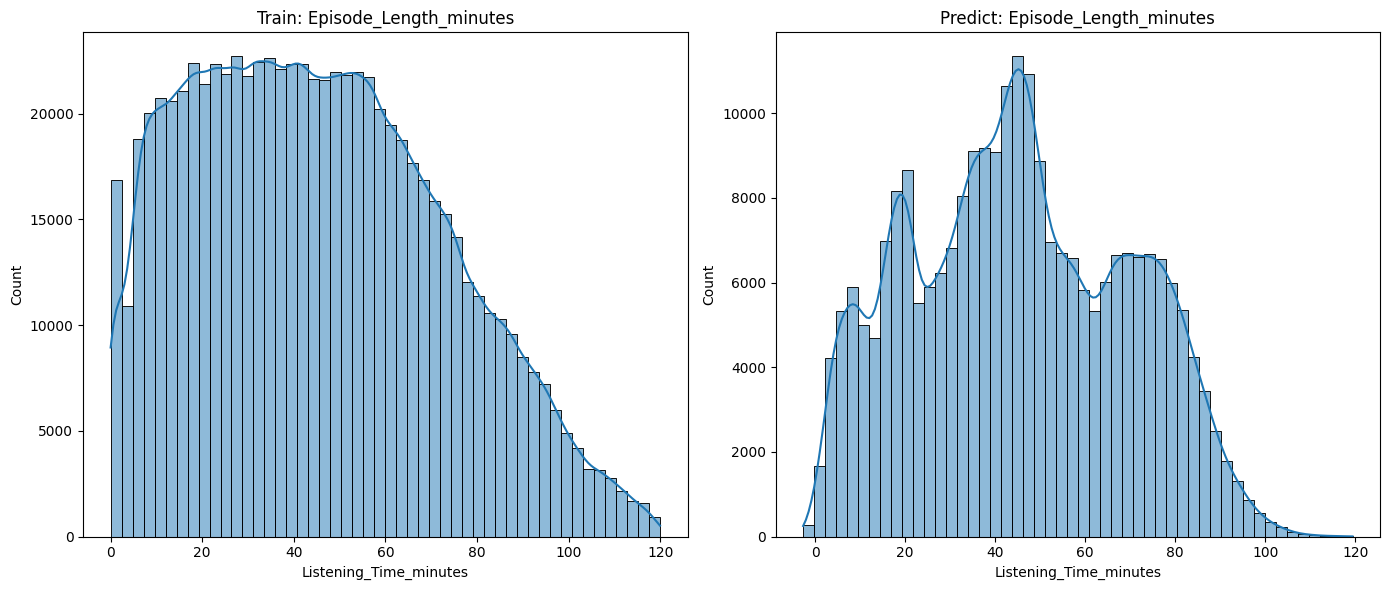

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# サブプロットの準備（横に2つ）
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# train データのヒストグラム + KDE
sns.histplot(train['Listening_Time_minutes'].dropna(), kde=True, bins=50, ax=axs[0])
axs[0].set_title('Train: Episode_Length_minutes')
#axs[0].set_xlabel('Episode_Length_minutes')

# predict データのヒストグラム + KDE
sns.histplot(submission['Listening_Time_minutes'].dropna(), kde=True, bins=50, ax=axs[1])
axs[1].set_title('Predict: Episode_Length_minutes')
#axs[1].set_xlabel('Episode_Length_minutes')

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [28]:
submission.isnull().sum()

id                        0
Listening_Time_minutes    0
dtype: int64

#12.84210

In [30]:
#submission.to_csv('submit/hybrid/hybrid_model_3.csv', index=False)